In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
df = pd.read_csv('BDL Feedback 31 May 2020.csv')
df.head()

,Agency,Agency_short(HR Pulse),Department,Job Function,Imported Designation,Updated Designation,Course Domain,Tag,CourseID,Course Name,Rated Date Time (SGT),Rating,Comment
0,Housing Development Board,HDB,,NaN,Hg Administrative Executive,NaN,NaN,"Basic Digital Literacy: Cyber Security,Prototy...",131976,BDLQ1: Cyber & Data Security Quiz,1/6/2020 9:26,5,Awareness on Cyber Security
1,Housing Development Board,HDB,,NaN,Hg Tech Executive (Building),NaN,Digitalisation,Prototype Testing Space,95206,BDLCD2: Data Security,1/6/2020 9:25,5,NaN
2,Housing Development Board,HDB,,NaN,Hg Tech Executive (Building),NaN,Digital,(BDLCD) Basic Digital Literacy: Cyber & Data S...,128176,BDLCD1: Cyber Security,1/6/2020 9:24,5,NaN
3,Vital,MOF,,Digitalisation Services CS VITAL,Support Officer,NaN,NaN,"Basic Digital Literacy: Cyber Security,Prototy...",131976,BDLQ1: Cyber & Data Security Quiz,1/6/2020 9:24,3,NaN
4,Housing Development Board,HDB,,NaN,Finance Executive,NaN,NaN,"Basic Digital Literacy: Cyber Security,Prototy...",131976,BDLQ1: Cyber & Data Security Quiz,1/6/2020 9:23,5,Good


In [3]:
# drop irrelevant columns
df.drop(columns=['Department', 'Job Function', 'Imported Designation','Updated Designation', 'Course Domain', 'CourseID','Rated Date Time (SGT)'],inplace=True)

## rename columns
df.rename({'Agency': 'agency', 'Agency_short(HR Pulse)': 'agency_short', 'Tag': 'tag', 'Course Name': 'course', 'Rating': 'rating', 'Comment': 'comment'}, axis=1, inplace=True)

## drop optional modules
df = df[~df.course.str.contains("Optional")]

## drop quizzes
df = df[~df.course.str.contains("Quiz")]

df.head()

,agency,agency_short,tag,course,rating,comment
1,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,5,NaN
2,Housing Development Board,HDB,(BDLCD) Basic Digital Literacy: Cyber & Data S...,BDLCD1: Cyber Security,5,NaN
5,Housing Development Board,HDB,(BDLID) Basic Digital Literacy: Information Li...,BDLID5: Boost Your Data Visualisations,4,Good
8,Immigration & Checkpoints Authority,MHA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL4: How Technology has Improved the Workplace,4,Ok
9,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,2,NaN


# Broad visualizations

In [4]:
# average rating across modules
group1 = df.groupby(['course']).mean()
group1

,rating
course,
BDLCC1: Communicate & Collaborate with the Right Tools,4.091923
BDLCC2: Communicate & Collaborate with Etiquette,4.162297
BDLCC3: Communicate & Collaborate with Agility,4.130388
BDLCD1: Cyber Security,4.450589
BDLCD2: Data Security,4.441941
BDLID1: Upskilling Yourself Personally & Professionally,3.901336
"BDLID2: What's Fake, What's Real Online?",4.150802
BDLID3: Introduction to Information Literacy & Data Interpretation,4.111621
BDLID4: Presenting and Interpreting Data,4.055195


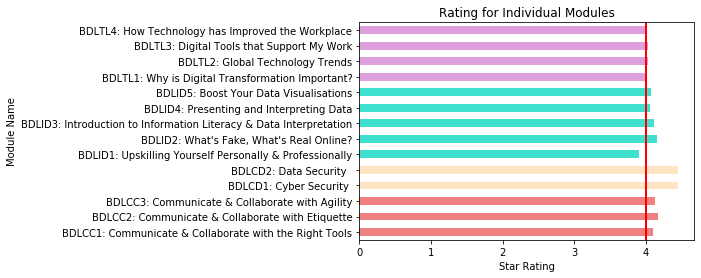

In [5]:
group1.reset_index().plot(
    x="course", y='rating', kind="barh",
    color= ['lightcoral','lightcoral','lightcoral','bisque','bisque','turquoise','turquoise','turquoise','turquoise','turquoise','plum','plum','plum','plum'],
    legend=None
)
plt.title('Rating for Individual Modules')
plt.xlabel("Star Rating")
plt.ylabel("Module Name")
plt.rcParams['figure.figsize'] = (6,3)
plt.axvline(x=4, linewidth=2, color='r')
plt.savefig('module_rating.png', bbox_inches = "tight")

# Create pathway

- create a new column for pathway based on module name


In [7]:
df["pathway"] = np.nan

In [17]:
def label_pathway(row):
    if 'BDLCC' in row['course']:
        return 'BDLCC'
    elif 'BDLCD' in row['course']:
        return 'BDLCD'
    elif 'BDLID' in row['course']:
        return 'BDLID'
    elif 'BDLTL' in row['course']:
        return 'BDLTL'

In [18]:
df['pathway'] = df.apply(lambda row: label_pathway(row), axis=1)
df.head()

,agency,agency_short,tag,course,rating,comment,pathway
1,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,5,NaN,BDLCD
2,Housing Development Board,HDB,(BDLCD) Basic Digital Literacy: Cyber & Data S...,BDLCD1: Cyber Security,5,NaN,BDLCD
5,Housing Development Board,HDB,(BDLID) Basic Digital Literacy: Information Li...,BDLID5: Boost Your Data Visualisations,4,Good,BDLID
8,Immigration & Checkpoints Authority,MHA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL4: How Technology has Improved the Workplace,4,Ok,BDLTL
9,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,2,NaN,BDLCD


In [19]:
# average rating across pathways
group2 = df.groupby(['pathway']).mean()
group2

,rating
pathway,
BDLCC,4.127512
BDLCD,4.446563
BDLID,4.053942
BDLTL,4.014438


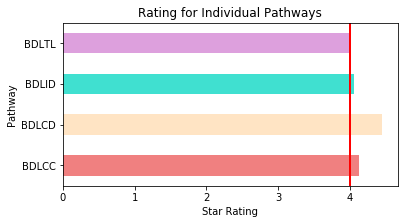

In [21]:
group2.reset_index().plot(
    x="pathway", y='rating', kind="barh",
    color= ['lightcoral', 'bisque','turquoise','plum'],
    legend=None
)
plt.title('Rating for Individual Pathways')
plt.xlabel("Star Rating")
plt.ylabel("Pathway")
plt.rcParams['figure.figsize'] = (6,3)
plt.axvline(x=4, linewidth=2, color='r')
plt.savefig('pathway_rating.png', bbox_inches = "tight")

# Bar graphs for pathways

In [24]:
data = pd.read_csv('final_predictions.csv')

In [25]:
data["sentiment"] = np.nan

def label_sentiment(row):
    if row['rating'] > 3:
        return 'pos'
    elif row['rating'] == 3:
        return 'neu'
    else:
        return 'neg'

data['sentiment'] = data.apply (lambda row: label_sentiment(row), axis=1)
data.head()

,Unnamed: 0,agency,agency_short,tag,course,rating,comment,aoi,topic,sentiment
0,2,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,4,Useful.,n,c,pos
1,3,Immigration & Checkpoints Authority,MHA,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL2: Global Technology Trends,4,"Ok,good.",n,d,pos
2,11,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,5,Informative,n,c,pos
3,18,Ministry of Defence,MINDEF,(BDLTL) Basic Digital Literacy: Technology Lit...,BDLTL1: Why is Digital Transformation Important?,3,Good.,n,c,neu
4,21,Housing Development Board,HDB,Prototype Testing Space,BDLCD2: Data Security,5,Understand better in cyber security,n,c,pos


## 1. CC

In [26]:
cc = data[data.course.str.contains("BDLCC")]

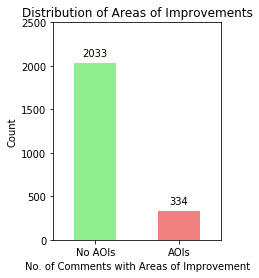

In [29]:
ax = cc.aoi.value_counts().plot(kind='bar', title='Distribution of Areas of Improvements', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("No. of Comments with Areas of Improvement")
plt.ylabel("Count")
plt.ylim(top=2500)
plt.rcParams['figure.figsize'] = (3,4)

group_labels = ['No AOIs', 'AOIs']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('cc_aoi_distribution.png', bbox_inches = "tight")

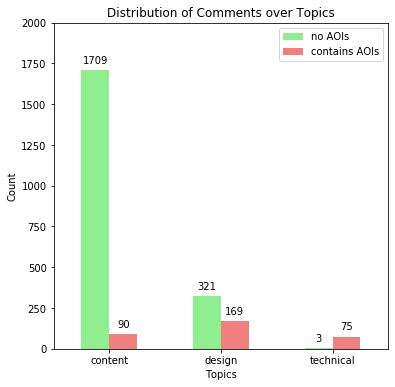

In [85]:
cross1 = pd.crosstab(cc['aoi'],cc['topic'])
cross2 = cross1.transpose()

ax = cross2.plot(kind='bar', title='Distribution of Comments over Topics', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Topics")
plt.ylabel("Count")
plt.ylim(top=2000)
plt.rcParams['figure.figsize'] = (3,6)

group_labels = ['content', 'design', 'technical']
sen_labels = ['no AOIs', 'contains AOIs']

ax.set_xticklabels(group_labels)
ax.legend(labels = sen_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('cc_topic_distribution.png',bbox_inches = "tight")

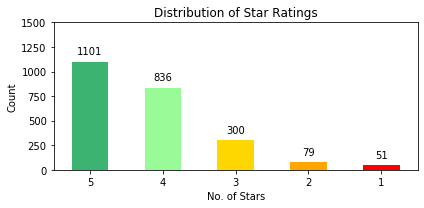

In [34]:
ax = cc.rating.value_counts().plot(kind='bar', title='Distribution of Star Ratings', color=['mediumseagreen', 'palegreen', 'gold', 'orange', 'red'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("No. of Stars")
plt.ylabel("Count")
plt.ylim(top=1500)
plt.rcParams['figure.figsize'] = (6,3)

group_labels = ['5', '4', '3', '2', '1']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig('cc_star_distribution.png')

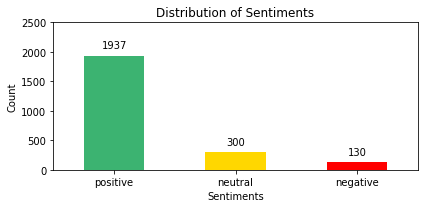

In [37]:
ax = cc.sentiment.value_counts().plot(kind='bar', title='Distribution of Sentiments', color=['mediumseagreen', 'gold', 'red'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.ylim(top=2500)
plt.rcParams['figure.figsize'] = (6,3)

group_labels = ['positive', 'neutral', 'negative']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig('cc_sentiment_distribution.png')

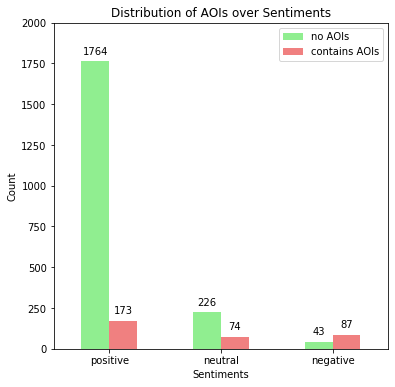

In [41]:
cross3 = pd.crosstab(cc['aoi'],cc['sentiment'])
cross4 = cross3.transpose()
cross5 = cross4[::-1] 

ax = cross5.plot(kind='bar', title='Distribution of AOIs over Sentiments', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.ylim(top=2000)
plt.rcParams['figure.figsize'] = (6,6)

group_labels = ['positive','neutral','negative']
sen_labels = ['no AOIs', 'contains AOIs']

ax.set_xticklabels(group_labels)
ax.legend(labels = sen_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('cc_sentiment_vs_aoi_distribution.png')

## 2. CD

In [40]:
cd = data[data.course.str.contains("BDLCD")]

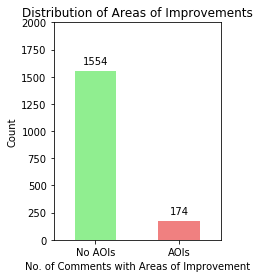

In [43]:
ax = cd.aoi.value_counts().plot(kind='bar', title='Distribution of Areas of Improvements', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("No. of Comments with Areas of Improvement")
plt.ylabel("Count")
plt.ylim(top=2000)
plt.rcParams['figure.figsize'] = (3,4)

group_labels = ['No AOIs', 'AOIs']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('cd_aoi_distribution.png', bbox_inches = "tight")

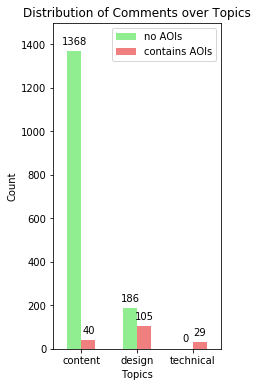

In [86]:
cross1 = pd.crosstab(cd['aoi'],cd['topic'])
cross2 = cross1.transpose()

ax = cross2.plot(kind='bar', title='Distribution of Comments over Topics', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Topics")
plt.ylabel("Count")
plt.ylim(top=1500)
plt.rcParams['figure.figsize'] = (3,6)

group_labels = ['content', 'design', 'technical']
sen_labels = ['no AOIs', 'contains AOIs']

ax.set_xticklabels(group_labels)
ax.legend(labels = sen_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('cd_topic_distribution.png',bbox_inches = "tight")

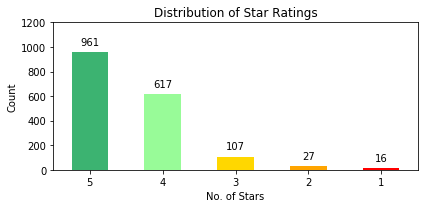

In [47]:
ax = cd.rating.value_counts().plot(kind='bar', title='Distribution of Star Ratings', color=['mediumseagreen', 'palegreen', 'gold', 'orange', 'red'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("No. of Stars")
plt.ylabel("Count")
plt.ylim(top=1200)
plt.rcParams['figure.figsize'] = (6,3)

group_labels = ['5', '4', '3', '2', '1']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig('cd_star_distribution.png')

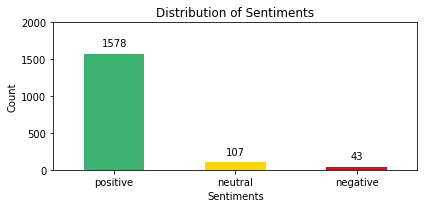

In [49]:
ax = cd.sentiment.value_counts().plot(kind='bar', title='Distribution of Sentiments', color=['mediumseagreen', 'gold', 'red'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.ylim(top=2000)
plt.rcParams['figure.figsize'] = (6,3)

group_labels = ['positive', 'neutral', 'negative']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig('cd_sentiment_distribution.png')

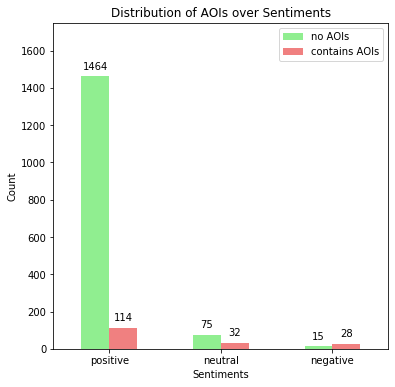

In [52]:
cross3 = pd.crosstab(cd['aoi'],cd['sentiment'])
cross4 = cross3.transpose()
cross5 = cross4[::-1] 

ax = cross5.plot(kind='bar', title='Distribution of AOIs over Sentiments', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.ylim(top=1750)
plt.rcParams['figure.figsize'] = (6,6)

group_labels = ['positive','neutral','negative']
sen_labels = ['no AOIs', 'contains AOIs']

ax.set_xticklabels(group_labels)
ax.legend(labels = sen_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('cd_sentiment_vs_aoi_distribution.png')

## 3. ID

In [53]:
bdlid = data[data.course.str.contains("BDLID")]

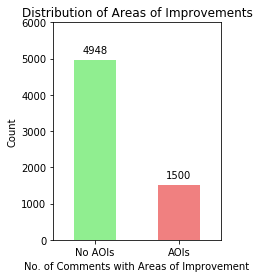

In [57]:
ax = bdlid.aoi.value_counts().plot(kind='bar', title='Distribution of Areas of Improvements', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("No. of Comments with Areas of Improvement")
plt.ylabel("Count")
plt.ylim(top=6000)
plt.rcParams['figure.figsize'] = (3,4)

group_labels = ['No AOIs', 'AOIs']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('id_aoi_distribution.png', bbox_inches = "tight")

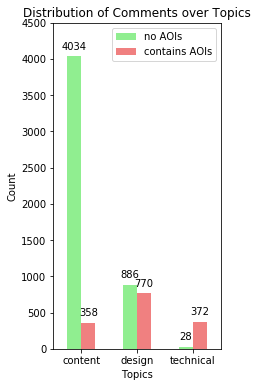

In [87]:
cross1 = pd.crosstab(bdlid['aoi'],bdlid['topic'])
cross2 = cross1.transpose()

ax = cross2.plot(kind='bar', title='Distribution of Comments over Topics', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Topics")
plt.ylabel("Count")
plt.ylim(top=4500)
plt.rcParams['figure.figsize'] = (3,6)

group_labels = ['content', 'design', 'technical']
sen_labels = ['no AOIs', 'contains AOIs']

ax.set_xticklabels(group_labels)
ax.legend(labels = sen_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('id_topic_distribution.png',bbox_inches = "tight")

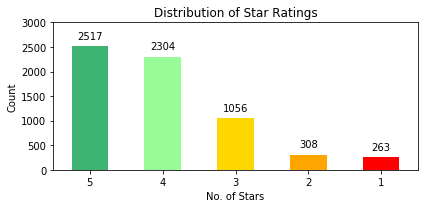

In [64]:
ax = bdlid.rating.value_counts().plot(kind='bar', title='Distribution of Star Ratings', color=['mediumseagreen', 'palegreen', 'gold', 'orange', 'red'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("No. of Stars")
plt.ylabel("Count")
plt.ylim(top=3000)
plt.rcParams['figure.figsize'] = (6,3)

group_labels = ['5', '4', '3', '2', '1']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig('id_star_distribution.png')

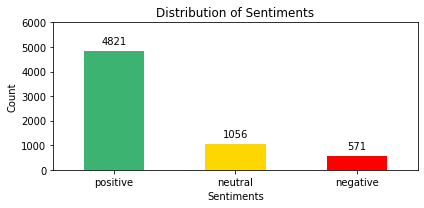

In [69]:
ax = bdlid.sentiment.value_counts().plot(kind='bar', title='Distribution of Sentiments', color=['mediumseagreen', 'gold', 'red'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.ylim(top=6000)
plt.rcParams['figure.figsize'] = (6,3)

group_labels = ['positive', 'neutral', 'negative']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig('id_sentiment_distribution.png')

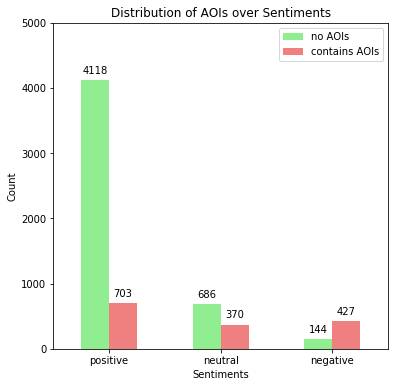

In [73]:
cross3 = pd.crosstab(bdlid['aoi'],bdlid['sentiment'])
cross4 = cross3.transpose()
cross5 = cross4[::-1] 

ax = cross5.plot(kind='bar', title='Distribution of AOIs over Sentiments', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.ylim(top=5000)
plt.rcParams['figure.figsize'] = (6,6)

group_labels = ['positive','neutral','negative']
sen_labels = ['no AOIs', 'contains AOIs']

ax.set_xticklabels(group_labels)
ax.legend(labels = sen_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('id_sentiment_vs_aoi_distribution.png')

## 4. TL

In [74]:
tl = data[data.course.str.contains("BDLTL")]

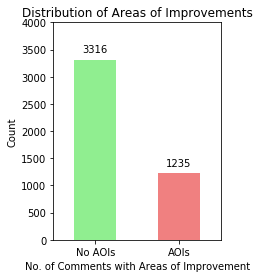

In [76]:
ax = tl.aoi.value_counts().plot(kind='bar', title='Distribution of Areas of Improvements', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("No. of Comments with Areas of Improvement")
plt.ylabel("Count")
plt.ylim(top=4000)
plt.rcParams['figure.figsize'] = (3,4)

group_labels = ['No AOIs', 'AOIs']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('tl_aoi_distribution.png', bbox_inches = "tight")

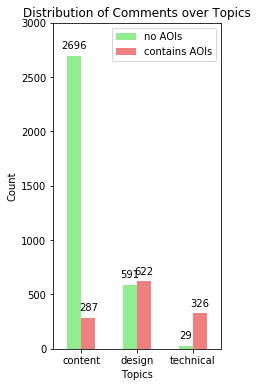

In [88]:
cross1 = pd.crosstab(tl['aoi'],tl['topic'])
cross2 = cross1.transpose()

ax = cross2.plot(kind='bar', title='Distribution of Comments over Topics', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Topics")
plt.ylabel("Count")
plt.ylim(top=3000)
plt.rcParams['figure.figsize'] = (3,6)

group_labels = ['content', 'design', 'technical']
sen_labels = ['no AOIs', 'contains AOIs']

ax.set_xticklabels(group_labels)
ax.legend(labels = sen_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('tl_topic_distribution.png',bbox_inches = "tight")

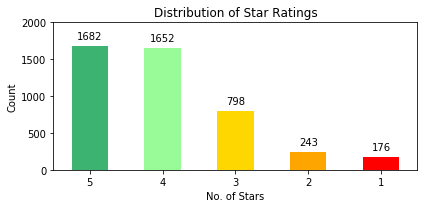

In [80]:
ax = tl.rating.value_counts().plot(kind='bar', title='Distribution of Star Ratings', color=['mediumseagreen', 'palegreen', 'gold', 'orange', 'red'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("No. of Stars")
plt.ylabel("Count")
plt.ylim(top=2000)
plt.rcParams['figure.figsize'] = (6,3)

group_labels = ['5', '4', '3', '2', '1']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig('tl_star_distribution.png')

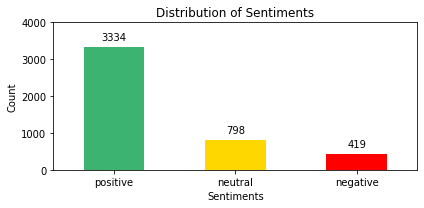

In [82]:
ax = tl.sentiment.value_counts().plot(kind='bar', title='Distribution of Sentiments', color=['mediumseagreen', 'gold', 'red'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.ylim(top=4000)
plt.rcParams['figure.figsize'] = (6,3)

group_labels = ['positive', 'neutral', 'negative']

ax.set_xticklabels(group_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig('tl_sentiment_distribution.png')

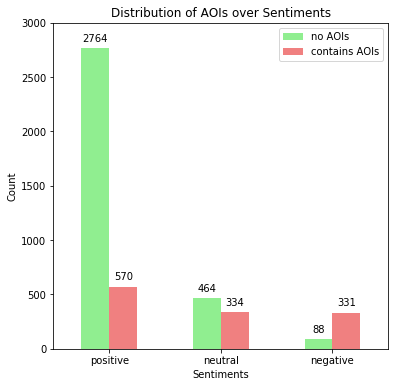

In [84]:
cross3 = pd.crosstab(tl['aoi'],tl['sentiment'])
cross4 = cross3.transpose()
cross5 = cross4[::-1] 

ax = cross5.plot(kind='bar', title='Distribution of AOIs over Sentiments', color=['lightgreen', 'lightcoral'])
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.ylim(top=3000)
plt.rcParams['figure.figsize'] = (6,6)

group_labels = ['positive','neutral','negative']
sen_labels = ['no AOIs', 'contains AOIs']

ax.set_xticklabels(group_labels)
ax.legend(labels = sen_labels)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('tl_sentiment_vs_aoi_distribution.png')